## part 1, 2 Perform the experiment using different optimizers with different hidden neurons 

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from keras.datasets import mnist
from tensorflow.keras.models import Model

In [35]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Load the dataset

In [36]:
latent_dim = [32,64,128] 
epochs = 10

In [13]:
class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

# autoencoder = Autoencoder(latent_dim)


In [14]:
# construct a plot that plots and saves the training history
def loss_plot(History, epochs):
  N = np.arange(0, epochs)
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(N, History.history["loss"], label="train_loss")
  plt.plot(N, History.history["val_loss"], label="val_loss")
  plt.title("Training Loss vs epochs")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss")
  plt.legend(loc="upper right")
  plt.savefig("plot")

In [15]:
# plot to show original image vs reconstructed image
def plot_show(x_test,decoded_imgs, pca_flag = False):
  n = 10
  plt.figure(figsize=(20, 4))
  for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    if pca_flag == False:
      plt.imshow(x_test[i])
    else:
      plt.imshow(x_test[i].reshape(28,28))
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    if pca_flag == False:
      plt.imshow(decoded_imgs[i])
    else:
      plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  plt.show()

### changing number of neurons with `adam` optimiser

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0532 - val_loss: 0.0163
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0149 - val_loss: 0.0114
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0115 - val_loss: 0.0105
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0108 - val_loss: 0.0102
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0106 - val_loss: 0.0101
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0104 - val_loss: 0.0100
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0103 - val_loss: 0.0099
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0102 - val_loss: 0.0099
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0102 - val_loss: 0.0100
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.010

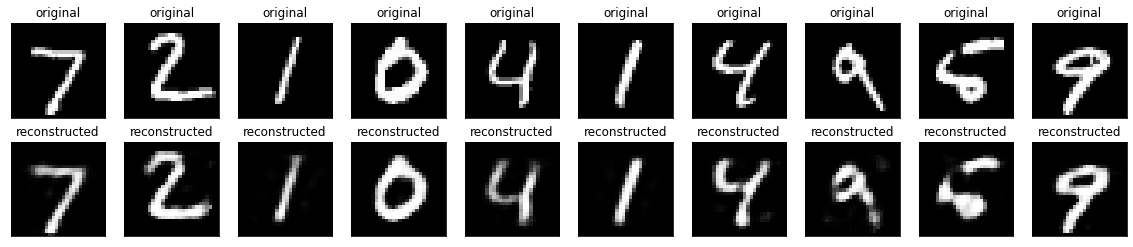

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0441 - val_loss: 0.0090
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0079 - val_loss: 0.0054
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0053 - val_loss: 0.0046
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0047 - val_loss: 0.0043
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0044 - val_loss: 0.0042
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0043 - val_loss: 0.0042
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0042 - val_loss: 0.0041
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0041 - val_loss: 0.0039
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.004

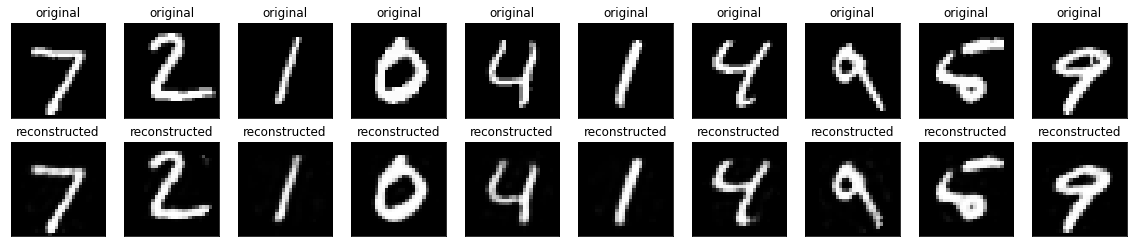

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0351 - val_loss: 0.0053
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0046 - val_loss: 0.0031
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0030 - val_loss: 0.0025
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0024 - val_loss: 0.0021
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.001

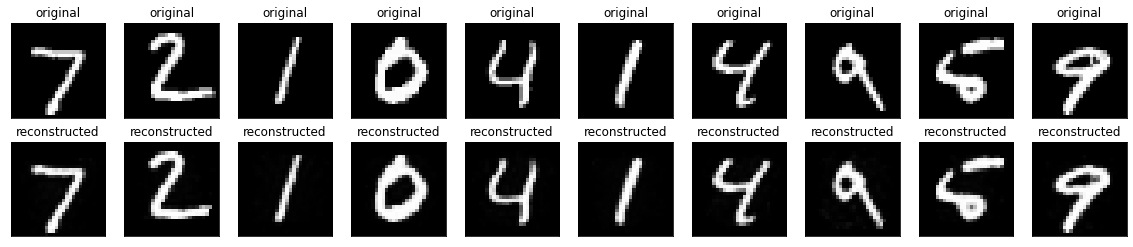

Training Loss vs epochs plot


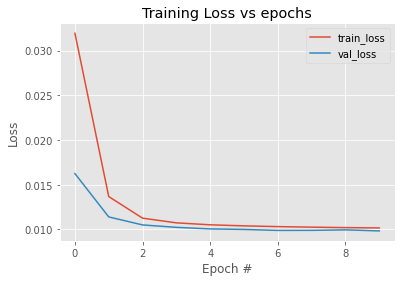

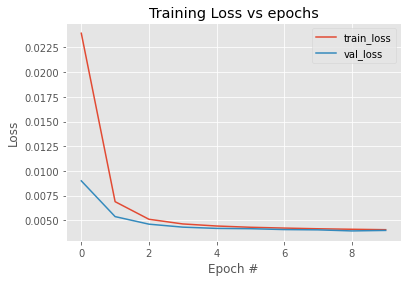

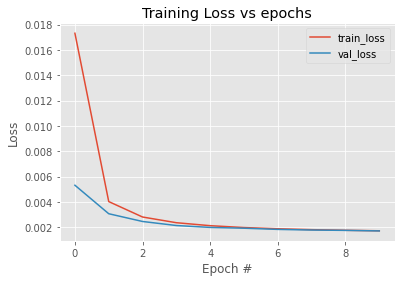

In [16]:
adam_loss = []
history = []
for i in range(len(latent_dim)):
    autoencoder = Autoencoder(latent_dim[i])
    autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
    H = autoencoder.fit(x_train, x_train, epochs = epochs, shuffle=True, validation_data=(x_test, x_test))
    history.append(H)
    adam_loss.append(H.history["loss"][-1])
    encoded_imgs = autoencoder.encoder(x_test).numpy()
    decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
    plot_show(x_test,decoded_imgs)

print("Training Loss vs epochs plot")
for h in history:
  loss_plot(h,epochs)

for adam optimiser
[0.010174766182899475, 0.004054221790283918, 0.0017211351078003645]
[32, 64, 128]


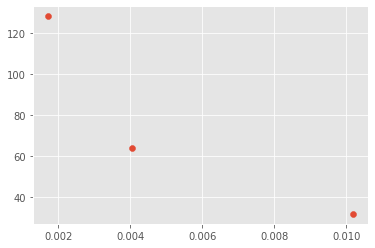

In [17]:
print("for adam optimiser")
print(adam_loss)
print(latent_dim)
plt.scatter(adam_loss, latent_dim)
plt.show()

### changing number of neurons with `RMSprop` optimiser

In [37]:
print (x_train.shape)
print (x_test.shape)
x_train = x_train.reshape(60000,28,28)
x_test = x_test.reshape(10000,28,28)
print (x_train.shape)
print (x_test.shape)


(60000, 28, 28)
(10000, 28, 28)
(60000, 28, 28)
(10000, 28, 28)


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0448 - val_loss: 0.0144
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0135 - val_loss: 0.0111
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0114 - val_loss: 0.0107
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0110 - val_loss: 0.0104
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0107 - val_loss: 0.0102
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0106 - val_loss: 0.0101
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0105 - val_loss: 0.0101
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0105 - val_loss: 0.0100
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0104 - val_loss: 0.0099
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.010

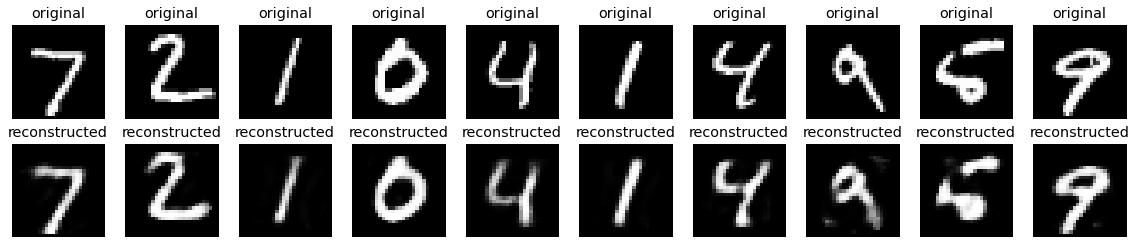

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0363 - val_loss: 0.0085
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0078 - val_loss: 0.0057
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0058 - val_loss: 0.0049
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0051 - val_loss: 0.0053
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0047 - val_loss: 0.0043
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0045 - val_loss: 0.0046
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0044 - val_loss: 0.0045
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0043 - val_loss: 0.0042
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0043 - val_loss: 0.0040
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.004

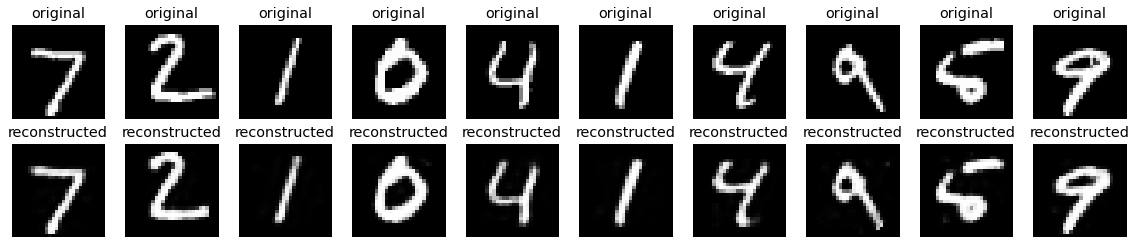

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0287 - val_loss: 0.0054
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0052 - val_loss: 0.0036
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0038 - val_loss: 0.0032
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0031 - val_loss: 0.0027
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0027 - val_loss: 0.0025
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0025 - val_loss: 0.0022
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0023 - val_loss: 0.0030
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0022 - val_loss: 0.0019
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.002

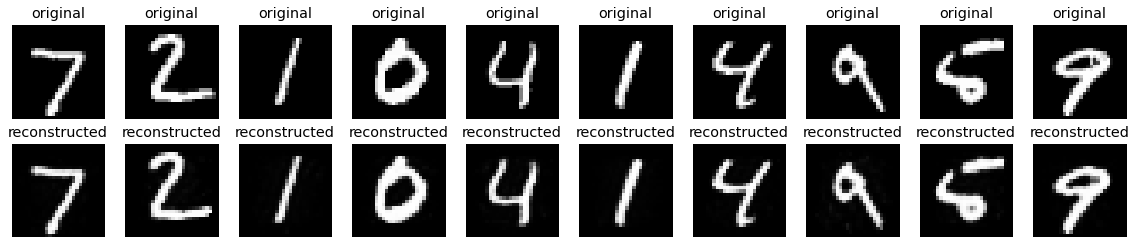

Training Loss vs epochs plot


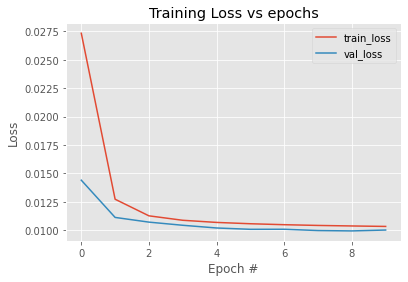

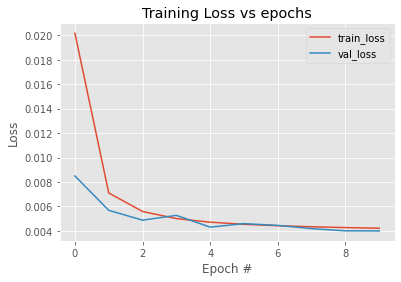

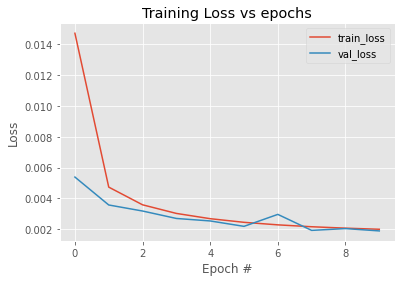

In [38]:
from keras.optimizers import RMSprop
RSMprop_loss = []
history = []
for i in range(len(latent_dim)):
    autoencoder = Autoencoder(latent_dim[i])
    autoencoder.compile(optimizer=RMSprop(), loss=losses.MeanSquaredError())
    H = autoencoder.fit(x_train, x_train, epochs = epochs, shuffle=True, validation_data=(x_test, x_test))
    history.append(H)
    RSMprop_loss.append(H.history["loss"][-1])
    encoded_imgs = autoencoder.encoder(x_test).numpy()
    decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
    plot_show(x_test,decoded_imgs)
    autoenc_test = decoded_imgs

print("Training Loss vs epochs plot")
for h in history:
  loss_plot(h,epochs)

for RSMprop_loss optimiser


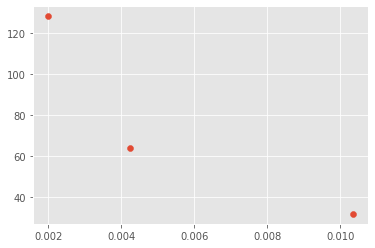

In [20]:
print("for RSMprop_loss optimiser")
# print(RSMprop_loss)
# print(latent_dim)
plt.scatter(RSMprop_loss, latent_dim)
plt.show()

### changing number of neurons with `SGD without momentum` optimiser

In [21]:
print (x_train.shape)
print (x_test.shape)
x_train = x_train.reshape(60000,28,28)
x_test = x_test.reshape(10000,28,28)
print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 28, 28)
(10000, 28, 28)


Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2306 - val_loss: 0.2274
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2256 - val_loss: 0.2176
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2126 - val_loss: 0.1904
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1797 - val_loss: 0.1423
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1319 - val_loss: 0.1037
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0990 - val_loss: 0.0867
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0850 - val_loss: 0.0798
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0791 - val_loss: 0.0765
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0763 - val_loss: 0.0747
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.074

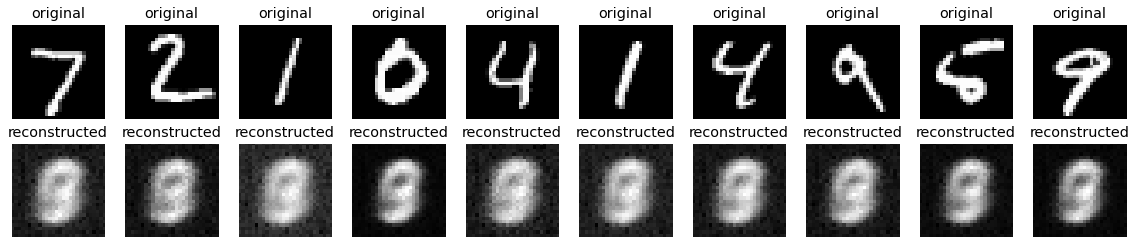

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2314 - val_loss: 0.2274
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2255 - val_loss: 0.2168
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2115 - val_loss: 0.1880
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1771 - val_loss: 0.1394
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1293 - val_loss: 0.1022
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0977 - val_loss: 0.0860
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0845 - val_loss: 0.0794
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0786 - val_loss: 0.0762
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0760 - val_loss: 0.0745
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.074

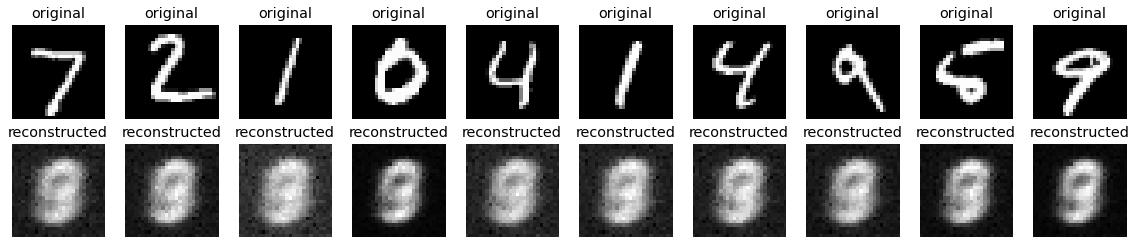

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2290 - val_loss: 0.2199
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2150 - val_loss: 0.1932
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1826 - val_loss: 0.1446
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1339 - val_loss: 0.1045
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0996 - val_loss: 0.0867
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0850 - val_loss: 0.0795
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0789 - val_loss: 0.0761
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0759 - val_loss: 0.0742
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0742 - val_loss: 0.0730
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.072

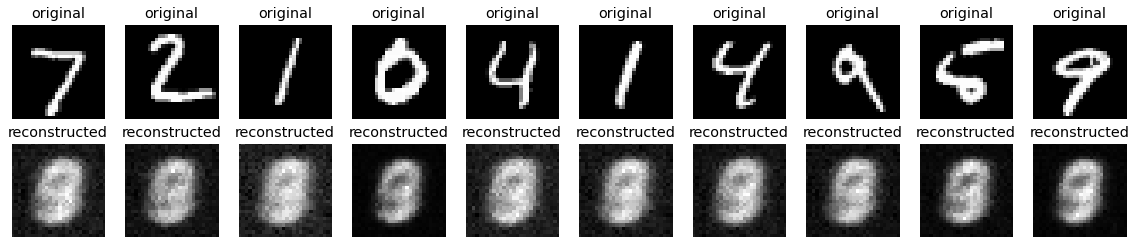

Training Loss vs epochs plot


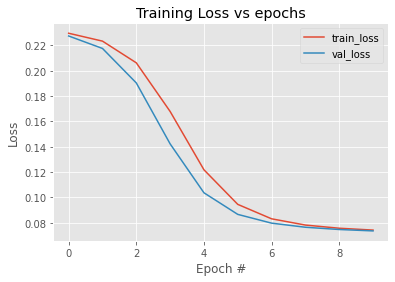

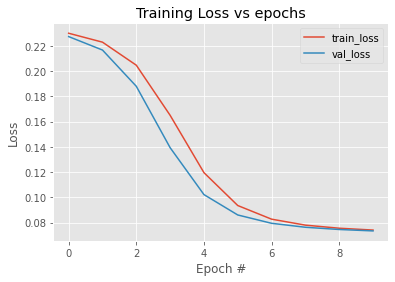

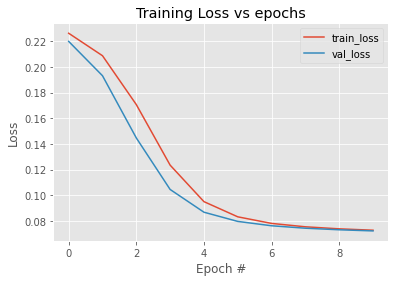

In [22]:
from keras.optimizers import SGD
SGD_no_momen = []
history = []
for i in range(len(latent_dim)):
    autoencoder = Autoencoder(latent_dim[i])
    autoencoder.compile(optimizer=SGD(), loss=losses.MeanSquaredError())
    H = autoencoder.fit(x_train, x_train, epochs = epochs, shuffle=True, validation_data=(x_test, x_test))
    history.append(H)
    SGD_no_momen.append(H.history["loss"][-1])
    encoded_imgs = autoencoder.encoder(x_test).numpy()
    decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
    plot_show(x_test,decoded_imgs)

print("Training Loss vs epochs plot")
for h in history:
  loss_plot(h,epochs)

for SGD without momentum optimiser
[0.07428885251283646, 0.07402738928794861, 0.0726783350110054]
[32, 64, 128]


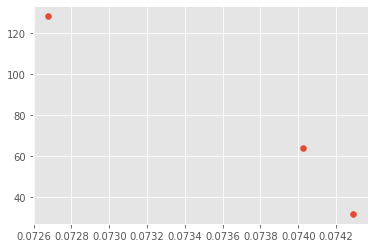

In [23]:
print("for SGD without momentum optimiser")
print(SGD_no_momen)
print(latent_dim)
plt.scatter(SGD_no_momen, latent_dim)
plt.show()

### changing number of neurons with `SGD with momentum` optimiser

In [24]:
print (x_train.shape)
print (x_test.shape)
x_train = x_train.reshape(60000,28,28)
x_test = x_test.reshape(10000,28,28)
print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 28, 28)
(10000, 28, 28)


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2242 - val_loss: 0.1583
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1260 - val_loss: 0.0798
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0775 - val_loss: 0.0734
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0730 - val_loss: 0.0717
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0715 - val_loss: 0.0708
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0706 - val_loss: 0.0701
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0700 - val_loss: 0.0696
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0694 - val_loss: 0.0691
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0690 - val_loss: 0.0685
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.068

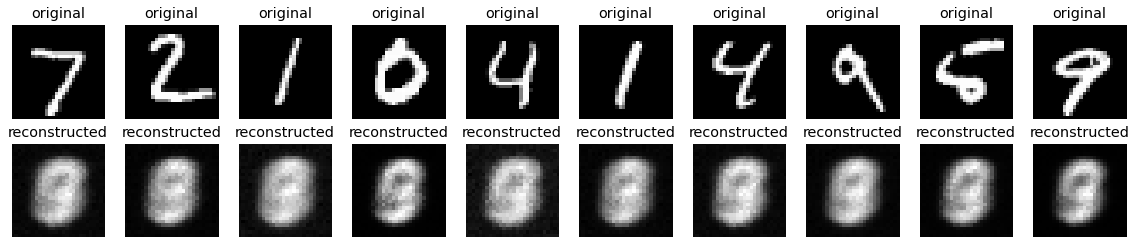

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2246 - val_loss: 0.1587
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1261 - val_loss: 0.0794
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0772 - val_loss: 0.0729
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0724 - val_loss: 0.0710
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0708 - val_loss: 0.0700
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0697 - val_loss: 0.0691
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0689 - val_loss: 0.0683
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0682 - val_loss: 0.0675
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0675 - val_loss: 0.0667
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.066

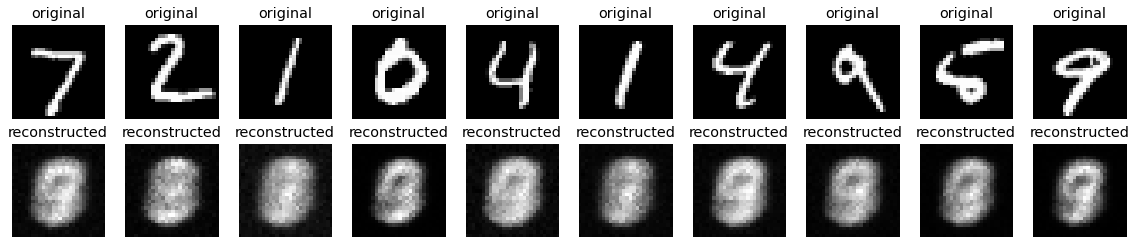

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2187 - val_loss: 0.1286
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1061 - val_loss: 0.0772
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0757 - val_loss: 0.0723
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0720 - val_loss: 0.0706
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0705 - val_loss: 0.0695
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0693 - val_loss: 0.0685
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0683 - val_loss: 0.0676
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0674 - val_loss: 0.0667
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0665 - val_loss: 0.0657
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.065

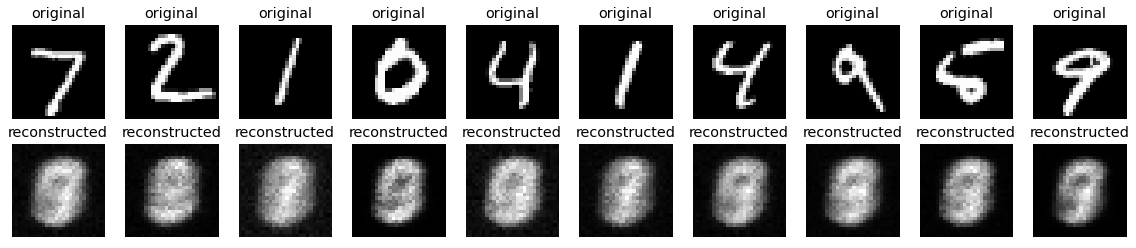

Training Loss vs epochs plot


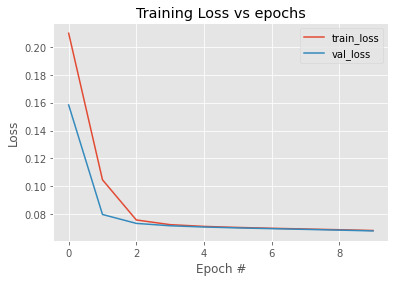

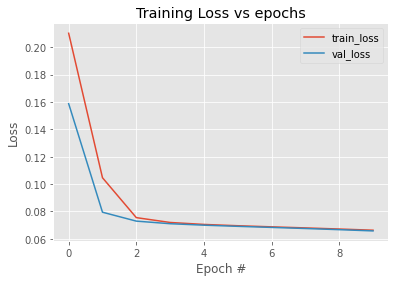

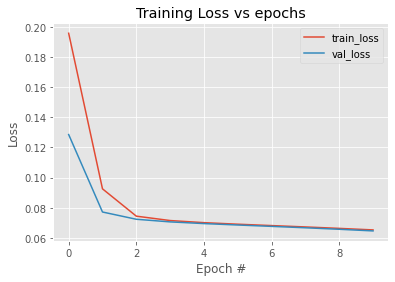

In [25]:
SGD_momen = []
history = []
for i in range(len(latent_dim)):
    autoencoder = Autoencoder(latent_dim[i])
    autoencoder.compile(optimizer=SGD(momentum = 0.7), loss=losses.MeanSquaredError())
    H = autoencoder.fit(x_train, x_train, epochs = epochs, shuffle=True, validation_data=(x_test, x_test))
    history.append(H)
    SGD_momen.append(H.history["loss"][-1])
    encoded_imgs = autoencoder.encoder(x_test).numpy()
    decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
    plot_show(x_test,decoded_imgs)

print("Training Loss vs epochs plot")
for h in history:
  loss_plot(h,epochs)

for SGD with momentum optimiser
[0.06826534122228622, 0.0662936121225357, 0.06527609378099442]
[32, 64, 128]


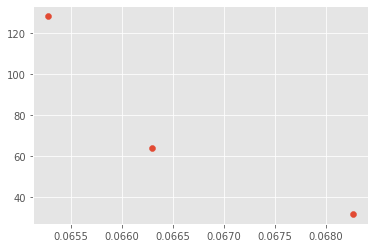

In [26]:
print("for SGD with momentum optimiser")
print(SGD_momen)
print(latent_dim)
plt.scatter(SGD_momen, latent_dim)
plt.show()

# Part 3- PCA reconstruction

In [28]:
from sklearn.decomposition import PCA
(x_train, _), (x_test, _) = mnist.load_data()
# x_train_plot = x_train
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
pca = PCA(100)
pca.fit(x_train)
Train = pca.transform(x_train)
test = pca.transform(x_test)
approximation_test = pca.inverse_transform(test)
approximation_train = pca.inverse_transform(Train)


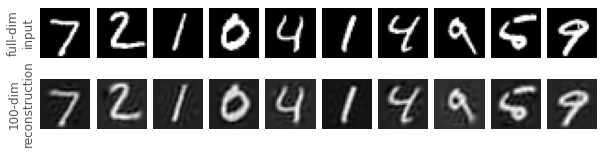

In [29]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(x_test[i].reshape(28, 28), cmap='binary_r')
    ax[1, i].imshow(approximation[i].reshape(28, 28), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('100-dim\nreconstruction');

In [31]:
pca_loss = ((x_test - approximation_test) ** 2)
pca_loss = np.sum(pca_loss,axis=1).mean()
print("pca loss 100 pc : ",pca_loss)

pca loss 100 pc :  4.4136205


In [39]:
pca_loss2 = ((autoenc_test.reshape(-1,28*28) - approximation_test) ** 2)
pca_loss2 = np.sum(pca_loss2,axis=1).mean()
print("loss : ",pca_loss2)

loss :  3.8289258
